In [1]:
import numpy as np
import scipy as sp
import scipy.stats 
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cross_validation import KFold, cross_val_score


# Regression Practice


## dataset

In [3]:
import pandas as pd

In [22]:
df = pd.read_csv("regression_data.csv")
df.tail()

,Salary,Years,PhD,Evaluation,Articles,Gender
95,46954,30,0,4.79,9,1
96,57783,33,0,4.98,14,0
97,50716,35,0,5.64,7,1
98,54640,35,0,5.17,6,1
99,26242,13,0,3.93,4,0


In [30]:
X = df.ix[:,1:]
y = df.ix[:,0]
X.head()
y.head()



0    62393
1    19943
2    59066
3    43825
4    53309
Name: Salary, dtype: int64

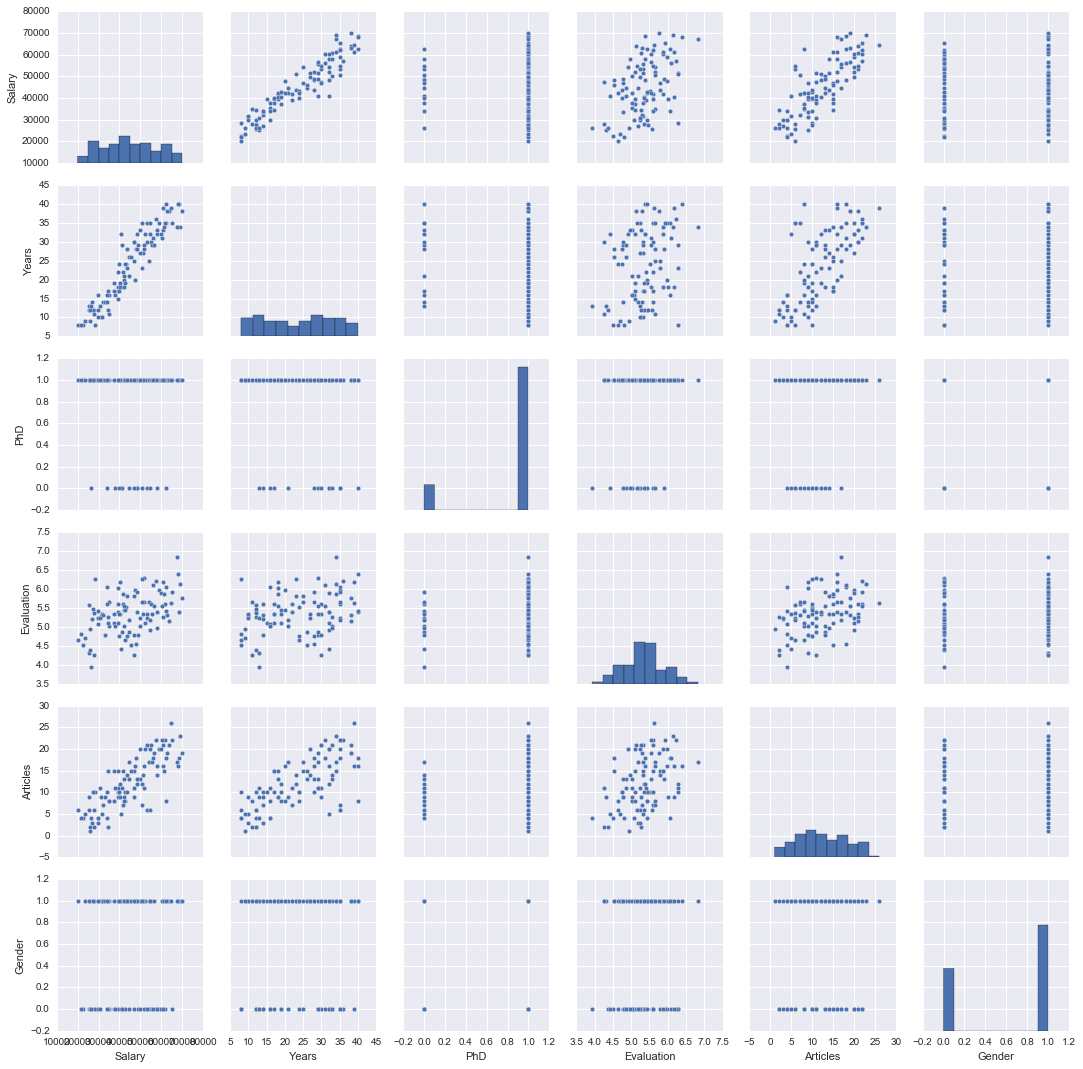

In [32]:
sns.pairplot(df)
plt.show()

## Using Statsmodel

In [26]:
df_agg = sm.add_constant(X)
df_agg.head()

,const,Years,PhD,Evaluation,Articles,Gender
0,1,35,1,6.05,18,1
1,1,8,1,4.64,6,1
2,1,35,1,5.97,20,0
3,1,23,1,5.80,14,1
4,1,30,1,5.33,21,0


In [33]:
df_new = pd.concat([df_agg, y], axis = 1)
df_new.head()

,const,Years,PhD,Evaluation,Articles,Gender,Salary
0,1,35,1,6.05,18,1,62393
1,1,8,1,4.64,6,1,19943
2,1,35,1,5.97,20,0,59066
3,1,23,1,5.80,14,1,43825
4,1,30,1,5.33,21,0,53309


In [48]:
model_sm = sm.OLS(df_new.ix[:,-1], df_new.ix[:,:-1])
result_sm_linear = model_sm.fit()
result_sm_ridge = model_sm.fit_regularized(alpha = 0.01, L1_wt = 0)
result_sm_lasso = model_sm.fit_regularized(alpha = 0.01, L1_wt = 1)
result_sm_elasticnet = model_sm.fit_regularized(alpha = 0.01, L1_wt = 0.5)

In [49]:
predict_sm_linear = result_sm.predict(df_new.ix[:,:-1])
predict_sm_ridge = result_sm_ridge.predict(df_new.ix[:,:-1])
predict_sm_lasso = result_sm_lasso.predict(df_new.ix[:,:-1])
predict_sm_elasticnet = result_sm_elasticnet.predict(df_new.ix[:,:-1])

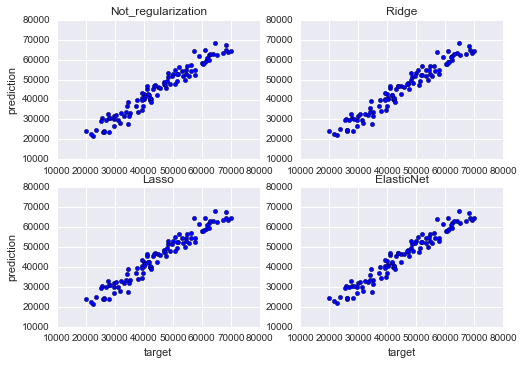

In [53]:
plt.subplot(2,2,1)
plt.scatter(y, predict_sm_linear )
#plt.xlabel('target')
plt.ylabel('prediction')
plt.title('Not_regularization')

plt.subplot(2,2,2)
plt.scatter(y, predict_sm_ridge )
#plt.xlabel('target')
#plt.ylabel('prediction')
plt.title('Ridge')

plt.subplot(2,2,3)
plt.scatter(y, predict_sm_lasso )
plt.xlabel('target')
plt.ylabel('prediction')
plt.title('Lasso')

plt.subplot(2,2,4)
plt.scatter(y, predict_sm_elasticnet )
plt.xlabel('target')
#plt.ylabel('prediction')
plt.title('ElasticNet')

plt.show()

In [60]:
print result_sm_linear.summary()

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     344.0
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           8.84e-59
Time:                        12:48:04   Log-Likelihood:                -939.93
No. Observations:                 100   AIC:                             1892.
Df Residuals:                      94   BIC:                             1907.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -5916.1893   3140.847     -1.884      0.0

Checking Outlier

In [1]:
sm.graphics.plot_leverage_resid2(result_sm)
plt.show()

NameError: name 'sm' is not defined

## using Sklearn 

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(X, y)

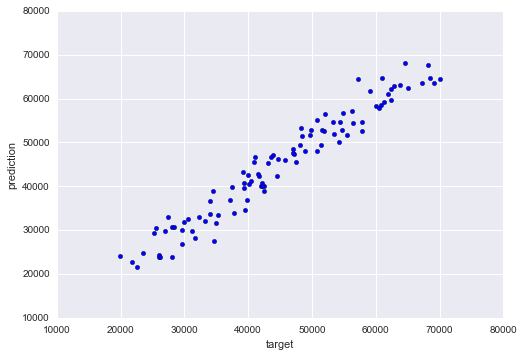

In [55]:
prediction = result.predict(X)
plt.scatter(y, prediction)
plt.xlabel('target')
plt.ylabel('prediction')
plt.show()

In [56]:
mean_abs_error = (np.abs((y - prediction)/y)*100).mean()
print 'MAE: ', mean_abs_error, "%"

MAE:  6.02057207255 %


In [59]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
cv = KFold(100, 10)
cross_val_score(model, X, y, "mean_squared_error", cv)

array([ -5563826.98508929,  -8628545.14784943,  -7489474.23107896,
       -10079793.78071261,  -7124145.98182783, -16634244.35034711,
       -12741901.63861028,  -4721701.21125831, -11975737.18099339,
       -24581449.49229024])